In [1]:
#packages needed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
my_data = pd.read_csv("kc_house_data.csv")
my_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# keep track of how many observations
count_observations = len(my_data)
print(count_observations,"\n")

nRow, nCol = my_data.shape
print(f'There are {nRow} rows and {nCol} columns')

21613 

There are 21613 rows and 21 columns


In [4]:
#to get information about the dataset 
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
#to get more information about the numerical data in our dataset
# get min, max, mean, std, quartiles for al the numerical columns/features
my_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#checking if our dataset has missing values
my_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
print('The Min Value for Price $' ,my_data['price'].min()) #Min Value
print('The Max Value for Price $' ,my_data['price'].max()) #Max Value
print("The Mean Value for Price $" , round(my_data['price'].mean()))

The Min Value for Price $ 75000.0
The Max Value for Price $ 7700000.0
The Mean Value for Price $ 540088


### Data Cleaning:

In [6]:
my_data['date'] = pd.to_datetime(my_data['date']) 
my_data['year'] = my_data['date'].dt.year #creating new year column
my_data = my_data.drop("date",axis=1) # dropping the column
my_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [7]:
# min, max, median, and mean of house price
my_data.price.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0


C:\Users\gayat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Boxplot for price before removing the outlier')]

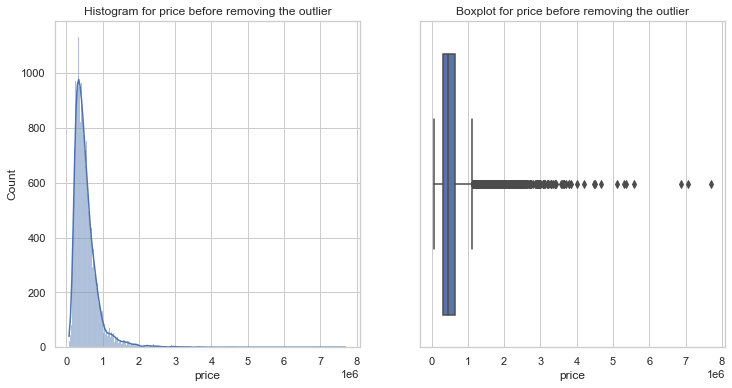

In [8]:
# Using histogram & boxplot we can see if there are any outliers.
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(data=my_data, x="price",kde = True).set(title='Histogram for price before removing the outlier')

plt.subplot(1, 2, 2)
sns.boxplot("price",data = my_data).set(title='Boxplot for price before removing the outlier')


# price has outliers. An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects

In [9]:
#Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.
# we want to remove the outliers

def remove_outlier(column,data):
    q1 =data[column].quantile(0.25)
    q3 =data[column].quantile(0.75)    
    IQR = q3-q1
    #To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, 
    #define the upper and the lower bound (1.5*IQR value is considered)
    
    upper = q3 + (1.5*IQR)
    lower = q1 - (1.5*IQR)
    upper_index = data[data[column] >=upper].index
    lower_index = data[data[column] <=lower].index
    data = data.drop(upper_index)
    data = data.drop(lower_index)
    return data
my_data = remove_outlier("price",my_data)
my_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [10]:
# keep track of how many observations
count_observations = len(my_data)
print(count_observations,"\n")

nRow, nCol = my_data.shape
print(f'There are {nRow} rows and {nCol} columns')

20467 

There are 20467 rows and 21 columns


C:\Users\gayat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Boxplot for price after removing the outlier')]

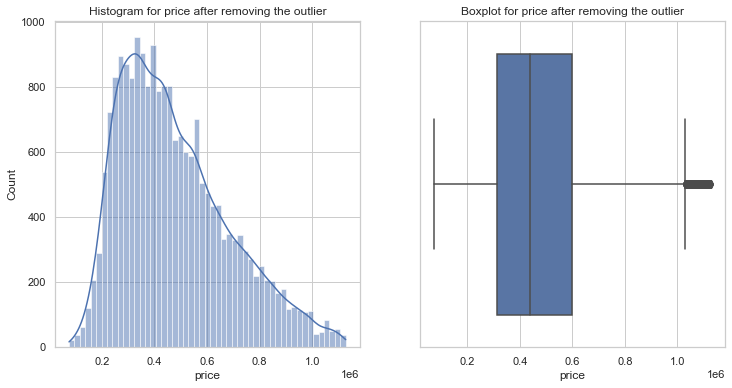

In [11]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(my_data, x="price",kde=True).set(title='Histogram for price after removing the outlier')

plt.subplot(1, 2, 2)
sns.boxplot("price",data = my_data).set(title='Boxplot for price after removing the outlier')

### Exploratory Data Analysis:

   index  Count
0   2014  13864
1   2015   6603


[Text(0.5, 1.0, 'Maximum homes sold')]

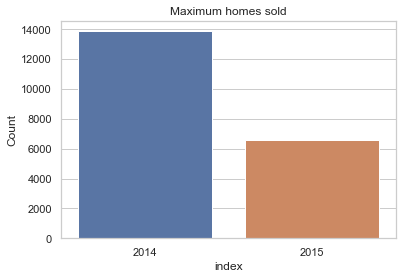

In [12]:
#1. 
p1 = my_data['year'].value_counts().rename('Count').reset_index()
print(p1)
sns.barplot(x = 'index',y = 'Count',data = p1).set(title='Maximum homes sold')

(1930.0, 2018.0)

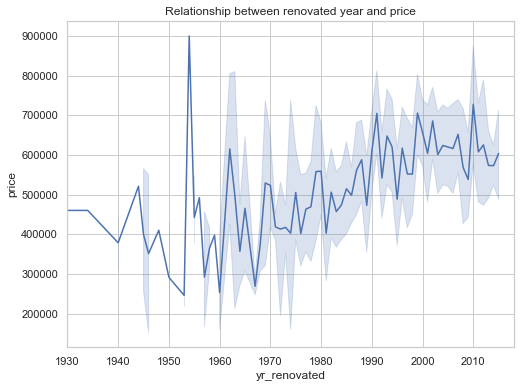

In [13]:
#2.
my_data['yr_renovated'].value_counts().sort_index().rename('Count').reset_index().T
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x = "yr_renovated",y ="price",data = my_data).set(title='Relationship between renovated year and price')                                                                
ax.set_xlim(1930,2018)

In [14]:
#3.
my_data['floors'].value_counts().to_frame().T

,1.0,2.0,1.5,3.0,2.5,3.5
floors,10448,7500,1829,573,110,7


<AxesSubplot:>

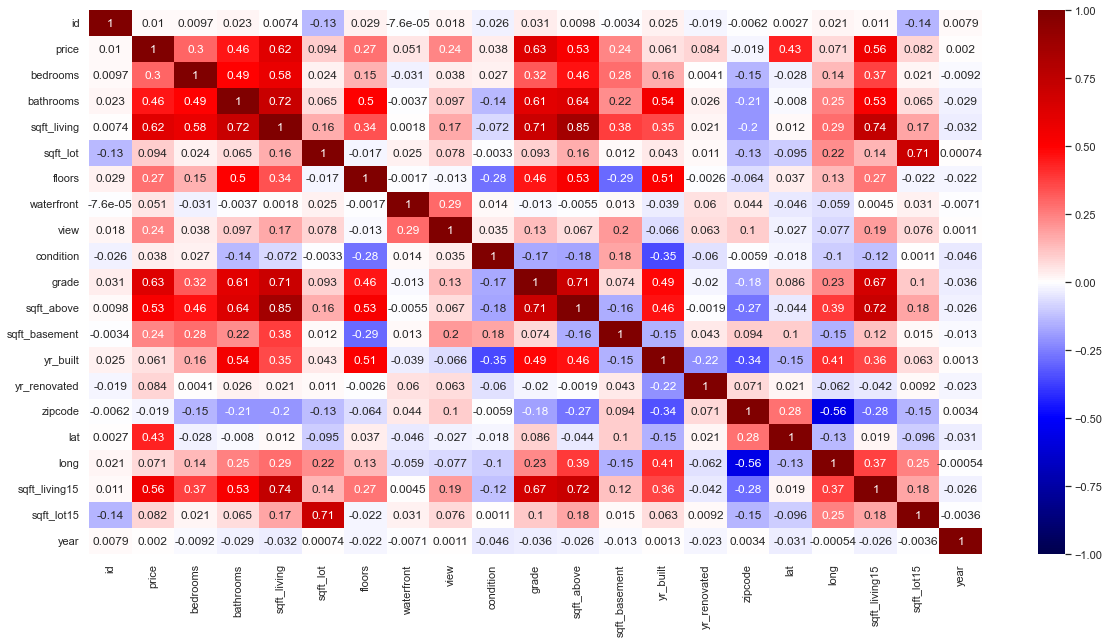

In [15]:
#4. heat map
plt.figure(figsize=(20,10))
sns.heatmap(my_data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

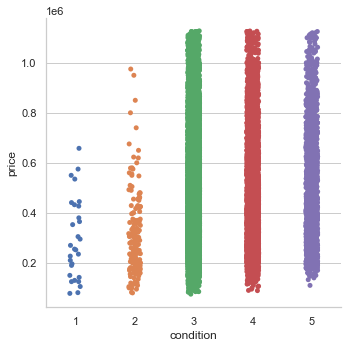

In [16]:
#5. Price & Condition
sns.set_theme(style="whitegrid")
sns.catplot(x='condition',y='price',data=my_data)

In [17]:
#6. Price & Bedrooms
dprice = my_data[['bedrooms','price']].astype(float)
dmean = dprice.groupby(['bedrooms', 'price']).sum().reset_index().groupby('bedrooms').mean().round()
dmean

,price
bedrooms,
0.0,335658.0
1.0,314755.0
2.0,409490.0
3.0,471075.0
4.0,563900.0
5.0,587634.0
6.0,608744.0
7.0,627759.0
8.0,588444.0


         7     8     9     6    10   5    11  4   12  3   1 
grade  8969  5948  2326  2037  768  242  139  29   5   3   1


[Text(0.5, 1.0, 'Relatiosnhip between grade and price')]

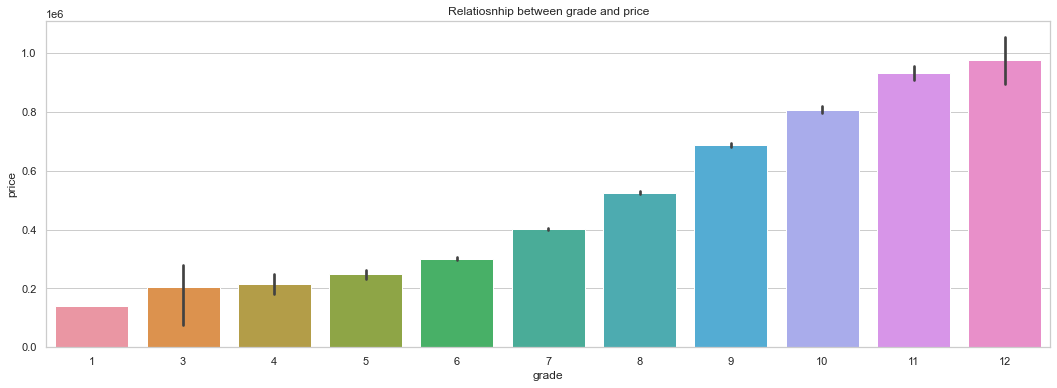

In [18]:
#7.Price and grade
print(my_data['grade'].value_counts().to_frame().T)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x="grade", y="price", data=my_data).set(title='Relatiosnhip between grade and price')

In [19]:
#8.zip code and price
dprice = my_data[['zipcode','price']].astype(float)
dmean = dprice.groupby(['zipcode', 'price']).sum().reset_index().groupby('zipcode').mean().round()
print("Top 10 locations:")
dmean.sort_values(by='price',ascending = False).head(10)

Top 10 locations:


,price
zipcode,
98039.0,900833.0
98004.0,833133.0
98040.0,832839.0
98005.0,751023.0
98112.0,735029.0
98075.0,734445.0
98102.0,714922.0
98119.0,706460.0
98109.0,705714.0


<AxesSubplot:xlabel='waterfront', ylabel='price'>

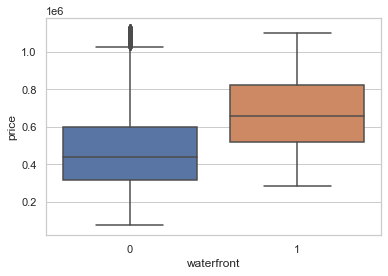

In [32]:
#9. Price and waterfront
sns.boxplot(x='waterfront', y='price', data=my_data)

<AxesSubplot:xlabel='view', ylabel='price'>

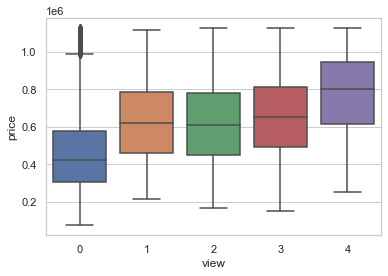

In [90]:
#10. Price and View
sns.boxplot(x='view', y='price', data=my_data)

2014    512
2005    423
2006    409
1977    405
2004    405
       ... 
1901     28
1902     24
1933     22
1935     22
1934     19
Name: Count, Length: 116, dtype: int64


<AxesSubplot:title={'center':'House Sales In King Country \n Number of Houses built from 1900 to 2015'}>

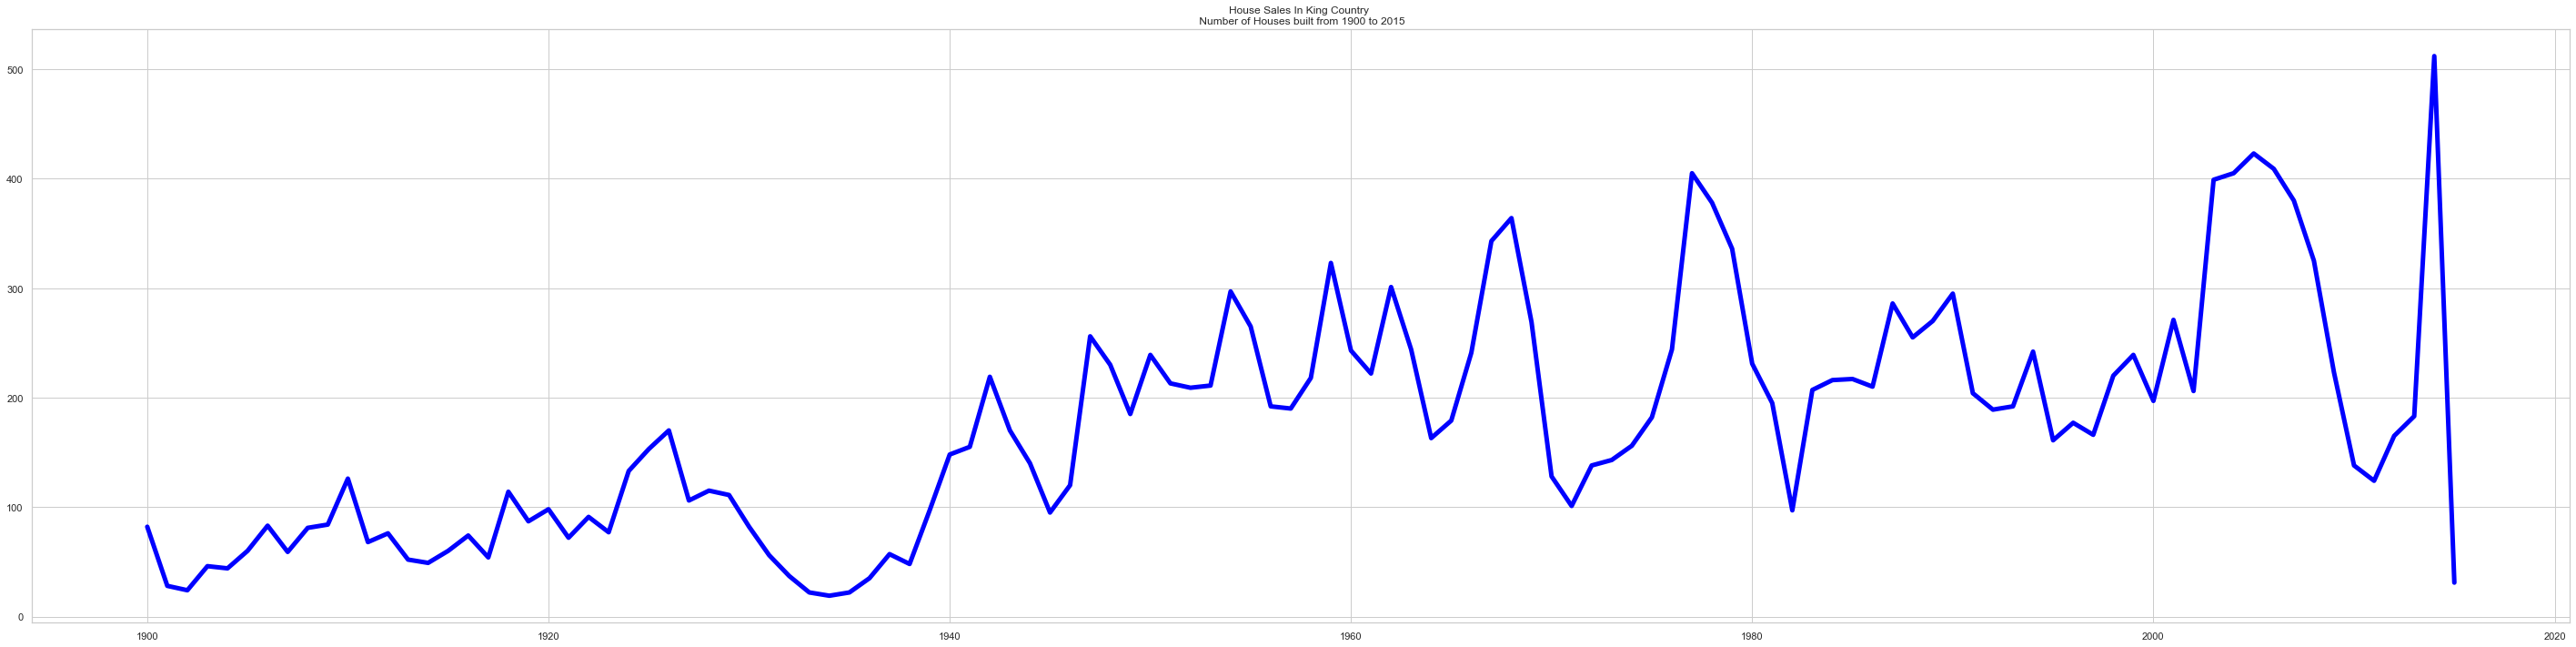

In [67]:
#12. 

print(my_data['yr_built'].value_counts().rename('Count'))
plt.figure(figsize=(50,12))
my_data['yr_built'].value_counts().sort_index().plot(kind = 'line',title = 'House Sales In King Country \n Number of Houses built from 1900 to 2015',color= "blue",linewidth=5)

### Simple Linear Regression Model 

In [20]:
my_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [21]:
# created a new column called Age
# Age is basically how old the house is (ie) 2022 - yr_built
from datetime import datetime, date
todays_date = date.today()
my_data['Age'] = todays_date.year - my_data['yr_built']
my_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,Age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,67
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,71
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,89
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,57
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,35


In [22]:
my_data['Age'].describe()

count    20467.000000
mean        51.188987
std         29.160540
min          7.000000
25%         26.000000
50%         48.000000
75%         71.000000
max        122.000000
Name: Age, dtype: float64

In [28]:
# Here we want to find the regression model between age and price.
# We want to know if age of the house will affect the price of the house.
# So here the dependent variable is the Age and the independent variable is price
# The model should be : Y(price) = beta0 +beta1(X:age)

In [23]:
model1 = my_data[['Age','price']]
model1

,Age,price
0,67,221900.0
1,71,538000.0
2,89,180000.0
3,57,604000.0
4,35,510000.0
...,...,...
21608,13,360000.0
21609,8,400000.0
21610,13,402101.0
21611,18,400000.0


In [24]:
model1.corr()

,Age,price
Age,1.000000,-0.061144
price,-0.061144,1.000000


In [25]:
#dependent variable:
y = model1.price
#independent variable:
x = model1.Age

In [26]:
m1 = LinearRegression()
m1.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [27]:
print("beta_0 =",m1.intercept_)
print("beta_1 =",m1.coef_)

beta_0 = 499349.7228137773
beta_1 = [-436.91357501]


In [28]:
print("R2 =",(m1.score(np.array(x).reshape(-1,1),y)))

R2 = 0.0037385789794375235


In [29]:
model1['Est_Price_With_Age'] = m1.intercept_ + (m1.coef_ * x)
model1.head()

C:\Users\gayat\AppData\Local\Temp/ipykernel_6924/1273429816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model1['Est_Price_With_Age'] = m1.intercept_ + (m1.coef_ * x)


,Age,price,Est_Price_With_Age
0,67,221900.0,470076.513288
1,71,538000.0,468328.858988
2,89,180000.0,460464.414638
3,57,604000.0,474445.649038
4,35,510000.0,484057.747689


### Multiple Linear Regression Model 

In [36]:
my_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'Age'],
      dtype='object')

In [37]:
#dependent variables
x = my_data.loc[:,["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view", "sqft_basement"]].values

#independent variables
y = my_data.loc[:,"price"].values.reshape(-1,1)

In [38]:
model2 = my_data[['price',"sqft_living","grade","sqft_above","sqft_living15","bathrooms","view", "sqft_basement"]]
model2

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement
0,221900.0,1180,7,1180,1340,1.00,0,0
1,538000.0,2570,7,2170,1690,2.25,0,400
2,180000.0,770,6,770,2720,1.00,0,0
3,604000.0,1960,7,1050,1360,3.00,0,910
4,510000.0,1680,8,1680,1800,2.00,0,0
...,...,...,...,...,...,...,...,...
21608,360000.0,1530,8,1530,1530,2.50,0,0
21609,400000.0,2310,8,2310,1830,2.50,0,0
21610,402101.0,1020,7,1020,1020,0.75,0,0
21611,400000.0,1600,8,1600,1410,2.50,0,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [40]:
m2 = LinearRegression()
m2.fit(X_train, y_train)

LinearRegression()

In [88]:
print("beta_0 =",m2.intercept_)
print("slopes  = ",m2.coef_.round(2),"\n")

beta_0 = [-302402.99736648]
slopes  =  [[ 5.862000e+01  7.788982e+04  7.340000e+00  4.002000e+01 -1.623223e+04
   3.738136e+04  5.128000e+01]] 



In [42]:
print("R2 =",(m2.score(X_train, y_train)))

R2 = 0.49061466339311055


In [91]:
0.49061466339311055*100

49.06146633931105

In [92]:
100-49.06146633931105

50.93853366068895

In [69]:
m2.score(X_test, y_test)

0.47846378198780115

In [84]:
y_pred = m2.predict(X_test)
y_pred

array([[260705.00658208],
       [684672.26968531],
       [622828.87836586],
       ...,
       [639453.66949074],
       [470362.15910039],
       [438438.45891136]])

### Assumptions Of Regression Model

* Linear relationship
* Multivariate normality
* No or little multicollinearity
* No auto-correlation
* Homoscedasticity

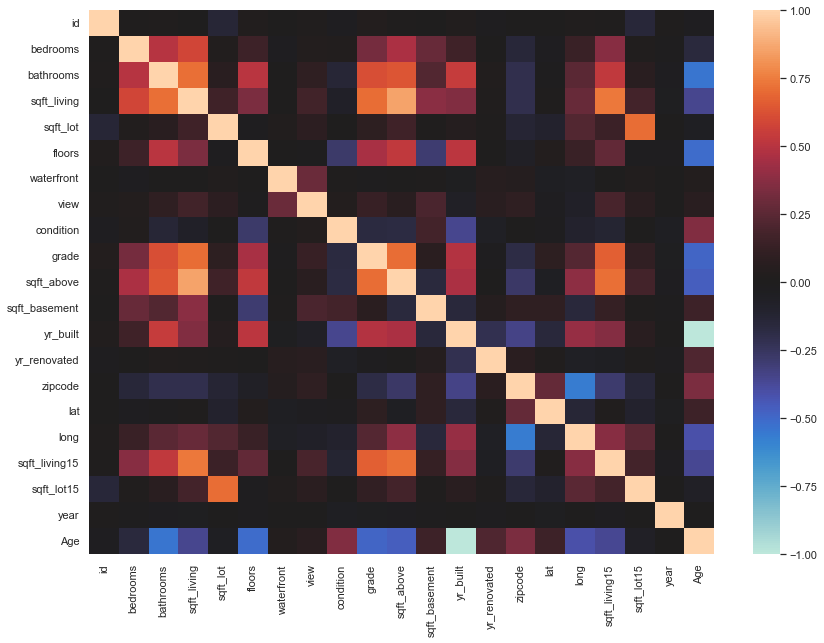

In [73]:
x = my_data.drop(columns=['price'], axis=1)
plt.figure(figsize=(14, 10))
sns.heatmap(x.corr(), center=0)
plt.show()

### statsmodels

In [77]:
import statsmodels.api as sm

In [78]:
import statsmodels.formula.api as smf

   Age     price
0   67  221900.0
1   71  538000.0
2   89  180000.0
3   57  604000.0
4   35  510000.0


In [87]:
model1 = my_data[['Age','price']]
print(model1.head())
print()

# dependent variable:
y = model1.price
#independent variable:
x = model1.Age

x = sm.add_constant(x) # adding a constant

m3 = sm.OLS(y, x).fit()
predictions = m3.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL: \n")
print_model = m3.summary()
print(print_model)

   Age     price
0   67  221900.0
1   71  538000.0
2   89  180000.0
3   57  604000.0
4   35  510000.0

SIMPLE LINEAR REGRESSION MODEL: 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     76.80
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           2.04e-18
Time:                        09:44:28   Log-Likelihood:            -2.7966e+05
No. Observations:               20467   AIC:                         5.593e+05
Df Residuals:                   20465   BIC:                         5.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [88]:
model2 = my_data[['price',"sqft_living","grade","sqft_above","sqft_living15","bathrooms","view", "sqft_basement"]]
print(model2.head())
print()

#dependent variables
x = my_data.loc[:,["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view", "sqft_basement"]].values
#independent variables
y = my_data.loc[:,"price"].values.reshape(-1,1)


x = sm.add_constant(x) # adding a constant

m4 = sm.OLS(y, x).fit()
predictions = m4.predict(x) 

print("MULTIPLE LINEAR REGRESSION MODEL: \n")
print_model = m4.summary()
print(print_model)


      price  sqft_living  grade  sqft_above  sqft_living15  bathrooms  view  \
0  221900.0         1180      7        1180           1340       1.00     0   
1  538000.0         2570      7        2170           1690       2.25     0   
2  180000.0          770      6         770           2720       1.00     0   
3  604000.0         1960      7        1050           1360       3.00     0   
4  510000.0         1680      8        1680           1800       2.00     0   

   sqft_basement  
0              0  
1            400  
2              0  
3            910  
4              0  

MULTIPLE LINEAR REGRESSION MODEL: 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     3254.
Date:                Fri, 29 Apr 2022   Prob (F-statistic)